# SimpleRNN Test Code

In [1]:
import warnings
warnings.filterwarnings('ignore')

> ## Import Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# I. SimpleRNN - without Normalization

> ## 1) Sample Data

* Inputs 데이터 생성(100, 5, 1)

In [3]:
X = [[[i + j] for i in range(5)] for j in range(100)]
X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

* Outputs 데이터 생성(100, 1)

In [4]:
y = [(i + 5) for i in range(100)]
y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

> ## 2) numpy_Array Casting

In [5]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)
X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

* 80:20

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary

* Unit(output_dim) : 3
* input_shape(input_lenght, input_dim) : (5, 1)
* return_sequences = False : 최종 Unit만 출력
* layers.Dense(1) : y_hat

In [7]:
from tensorflow.keras import models, layers
model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3, input_shape = (5, 1), return_sequences = False))
model_1.add(layers.Dense(1))
model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 15        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [8]:
model_1.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

### (3) Model Fit

In [9]:
Hist_1 = model_1.fit(X_train, y_train,
                      epochs = 100,
                      batch_size = 8,
                      validation_data = (X_test, y_test),
                      verbose = 0)

### (4) Model Predict

In [10]:
y_hat = model_1.predict(X_test, verbose = 0)

### (5) 학습 결과 시각화

* Loss 감소

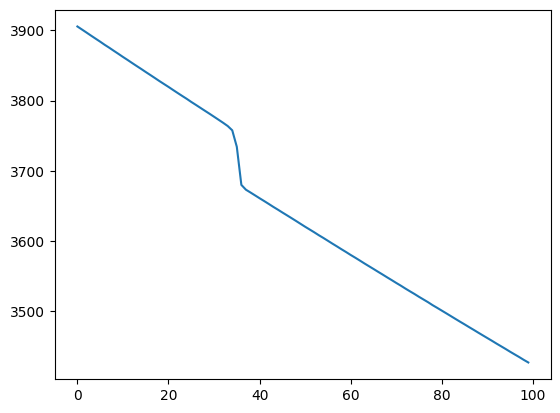

In [11]:
plt.plot(Hist_1.history['loss'])
plt.show()

* 학습 되지 않음
  * 녹색 -> 정답(y_test)
  * 적색 -> 예측(y_hat)

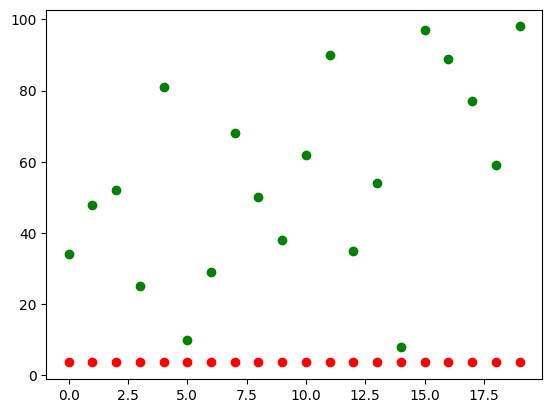

In [12]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# II. SimpleRNN - with Normalization

> ## 1) Sample Data - with Normalization

In [13]:
X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]
X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ## 2) Casting

In [14]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)
X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary
* None : input_length 자동 맞춤

In [16]:
model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3, input_shape = (None, 1), return_sequences = False))
model_2.add(layers.Dense(1))
model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [17]:
model_2.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

### (3) Model Fit

In [18]:
Hist_2 = model_2.fit(X_train, y_train,
                      epochs = 100,
                      batch_size = 8,
                      validation_data = (X_test, y_test),
                      verbose = 0)

### (4) Model Predict

In [19]:
y_at = model_2.predict(X_test, verbose=0)

### (5) 학습 결과 시각화
* Loss 감소

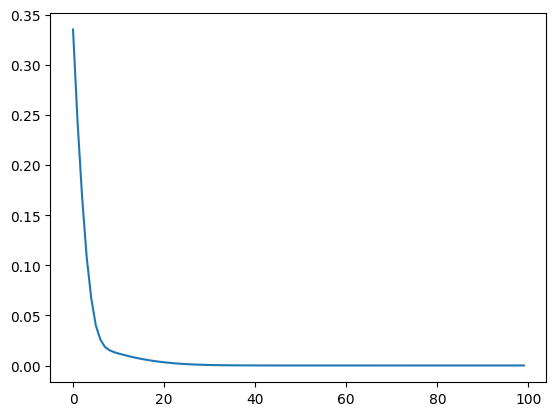

In [20]:
plt.plot(Hist_2.history['loss'])
plt.show()

* 학습 진행
  * 녹색 -> 정답(y_test)
  * 적색 -> 예측(y_hat)

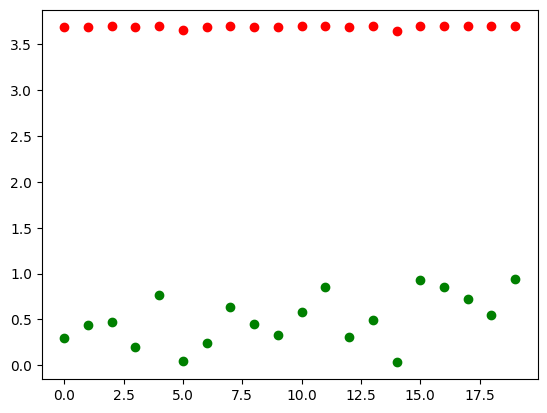

In [21]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# III. Stacked_SimpleRNN

> ## 1) Model Define & Summary
* return_sequences = True

In [22]:
model_3 = models.Sequential(name = 'Stackd_RNN')
model_3.add(layers.SimpleRNN(3, input_shape = (None, 1), return_sequences = True))
model_3.add(layers.SimpleRNN(3, input_shape = (None, 1), return_sequences = False))
model_3.add(layers.Dense(1))
model_3.summary()

Model: "Stackd_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, None, 3)           15        
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [23]:
model_3.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

> ## 3) Model Fit

In [24]:
Hist_3 = model_3.fit(X_train, y_train,
                      epochs = 100,
                      batch_size = 8,
                      validation_data = (X_test, y_test),
                      verbose = 0)

> ## 4) Model Predict

In [25]:
y_hat = model_3.predict(X_test, verbose = 0)

> ## 5) 학습 결과 시각화

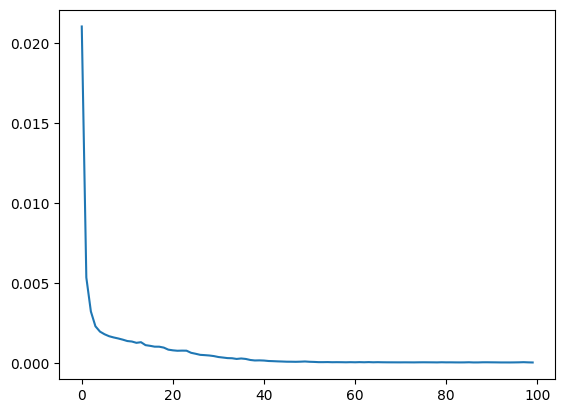

In [26]:
plt.plot(Hist_3.history['loss'])
plt.show()

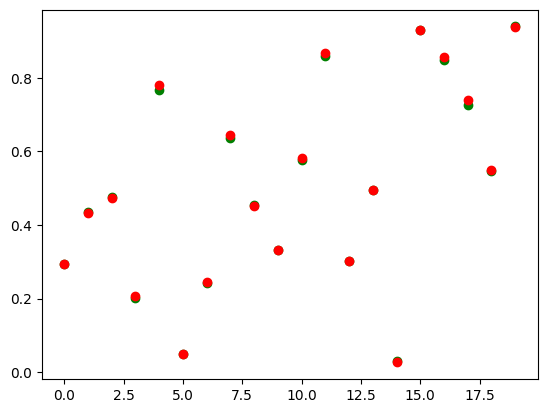

In [27]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# IV. 'return_sequences' Output_Options

* 'input_length'에 대한 Sequance 전체를 출력할지 설정
  * Sequence: Hidden State
  * 'False' vs. 'True'

> ## 1) 실습데이터 생성

In [28]:
X = [[[i + j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]

In [29]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 2) 테스트용 Input Data

In [31]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

> ## 3) False_Option

* 마지막 Output만 출력
  * Unit -> 1

In [32]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1, input_shape = (5, 1), return_sequences = False))
Model_False.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

* Output 1개

In [33]:
Model_False.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[-1.]], dtype=float32)

* 마지막 Output만 출력
  * Unit -> 3

In [34]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3, input_shape = (5, 1), return_sequences = False))
Model_False.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

* Output 1개(3개 Unit)

In [35]:
Model_False.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[-1., -1.,  1.]], dtype=float32)

> ## 4) True_Option

* 매 순환마다 Output 출력
  * Unit -> 1
  * input_length -> 5

In [36]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1, input_shape = (5, 1), return_sequences = True))
Model_True.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

* Output 5개(Hidden State)

In [37]:
Model_True.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.]]], dtype=float32)

* 매 순환마다 Output만 출력
  * Unit -> 3
  * input_length -> 5

In [38]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3, input_shape = (5, 1), return_sequences = True))
Model_True.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

* Output 5개(Hidden State)

In [39]:
Model_True.predict(X_test[0].reshape(1, 5, 1), verbose = 0)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)